In [1]:
import pandas as pd
import time
import os
import numpy as np
import requests
from fredapi import Fred
import json
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
import janitor

In [2]:
apple = yf.Ticker('AAPL')

apple.info

C:\Users\jabob\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connection.py:374: DeprecationWarning: ssl.match_hostname() is deprecated
  match_hostname(cert, asserted_hostname)
C:\Users\jabob\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connection.py:374: DeprecationWarning: ssl.match_hostname() is deprecated
  match_hostname(cert, asserted_hostname)
C:\Users\jabob\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connection.py:374: DeprecationWarning: ssl.match_hostname() is deprecated
  match_hostname(cert, asserted_hostname)


{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [3]:
current_working = os.getcwd()
pathing = '/key/fred_key.json'

In [4]:
key_path  = os.path.join(current_working+ pathing)

with open(key_path) as f:
    config = json.load(f)

key = config['fred_key']

fred = Fred(api_key=key)

sp500 = fred.get_series('SP500')
df = pd.DataFrame(sp500).reset_index()
df.rename(columns={'index': 'date', 0: 'price'}, inplace=True)

df = df[df['date'] > '2020-01-01']
date_data = df['date']
price_data = df['price']
price_data = price_data.astype(float)
data = df[round(price_data).apply(lambda x: x % 2 == 0)]
data

,date,price
1218,2020-01-02,3257.85
1220,2020-01-06,3246.28
1225,2020-01-13,3288.13
1229,2020-01-17,3329.62
1232,2020-01-22,3321.75
...,...,...
2597,2025-04-16,5275.70
2600,2025-04-21,5158.20
2601,2025-04-22,5287.76
2602,2025-04-23,5375.86


C:\Users\jabob\AppData\Local\Temp\ipykernel_22828\196349268.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f"{y:,.2f}" for y in ax1.get_yticks()])


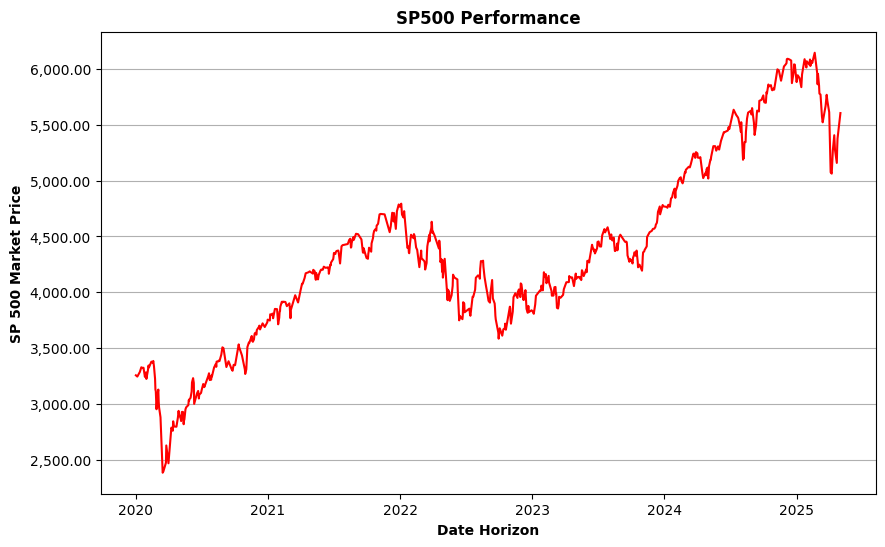

In [5]:
def sp500(dates = date_data, price = price_data):
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Correct way to set figure size
    ax1.plot(data['date'], data['price'], color ='red')
    ax1.set_ylabel('SP 500 Market Price', fontweight= 'bold')
    ax1.set_xlabel('Date Horizon', fontweight = 'bold')
    ax1.set_title('SP500 Performance', fontweight = 'bold')
    ax1.set_yticklabels([f"{y:,.2f}" for y in ax1.get_yticks()])
    ax1.grid(axis = 'y')


sp500()